## Session 01: Linear Regression

In [1]:
import numpy as np

In [2]:
np.random.seed(42)

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

We'll use the wine quality data for this notebook

In [108]:
community_columns = ["state", "county", "community", "communityname", "fold", "population", "householdsize", "racepctblack", "racePctWhite", "racePctAsian", "racePctHisp", "agePct12t21", "agePct12t29", "agePct16t24", "agePct65up", "numbUrban", "pctUrban", "medIncome", "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire", "medFamInc", "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap", "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade", "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy", "PctEmplManu", "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce", "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam", "PctFam2Par", "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom", "NumIlleg", "PctIlleg", "NumImmig", "PctImmigRecent", "PctImmigRec5", "PctImmigRec8", "PctImmigRec10", "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10", "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup", "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous", "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR", "HousVacant", "PctHousOccup", "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos", "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb", "OwnOccLowQuart", "OwnOccMedVal", "OwnOccHiQuart", "RentLowQ", "RentMedian", "RentHighQ", "MedRent", "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet", "PctForeignBorn", "PctBornSameState", "PctSameHouse85", "PctSameCity85", "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop", "LemasSwFTFieldOps", "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop", "PolicReqPerOffic", "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack", "PctPolicHisp", "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits", "NumKindsDrugsSeiz", "PolicAveOTWorked", "LandArea", "PopDens", "PctUsePubTrans", "PolicCars", "PolicOperBudg", "LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn", "PolicBudgPerPop", "ViolentCrimesPerPop"]
communities = np.genfromtxt('communities.csv', delimiter=',', names=community_columns)

In [109]:
len(communities.dtype.names)

128

### Univariate Linear Regression

This is basically linear regression with 1 predictor variable.

Model:   
$y = \theta_0 + \theta_1 x$

There are two ways to fit a linear regression model, depending on the number of features. For a smaller number of features (say <10k), you can use the Normal equation form to solve for $\theta$ directly.

For more than 10k features, you probably want to use gradient descent.

Assuming that we write the model in matrix form as:

$y = \Theta^T X$,

where $\Theta, X \in \mathbb{R}^{n}$,

The Normal equation is given by:

$\theta = (X^T X)^{-1} X^T y$

In [111]:
x0 = np.ones(len(communities)) # Models the intercept
x = communities['PctIlleg']

In [120]:
X = np.array([x0, x]).T
y = communities['ViolentCrimesPerPop']

In [121]:
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)

In [127]:
theta[1]

0.74770882059423016

In [122]:
theta

array([ 0.05105548,  0.74770882])

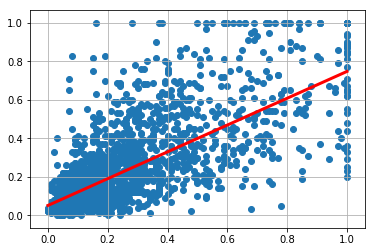

In [131]:
fig, ax = plt.subplots()
ax.scatter(df['PctIlleg'], df['ViolentCrimesPerPop'])
ax.plot([0, 1], theta, linewidth=3, c='red')
ax.grid()

### Multivariate Linear Regression

This is linear regression with multiple predictor variables.

Model:
    
$y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 \ldots + \theta_n x_n$

In [94]:
df = pd.read_csv('communities.csv', header=None)

In [102]:
for field in df.columns:
    try:
        print(field, ":", np.corrcoef(df[field], df['ViolentCrimesPerPop'])[1][0])
    except:
        pass

state : -0.211397515396
fold : -0.0325766614238
population : 0.367157378274
householdsize : -0.0349225953359
racepctblack : 0.63126363466
racePctWhite : -0.684769576272
racePctAsian : 0.0376217867814
racePctHisp : 0.293050218125
agePct12t21 : 0.0604772486579
agePct12t29 : 0.153356688263
agePct16t24 : 0.0993466802092
agePct65up : 0.0671714539886
numbUrban : 0.362897442226
pctUrban : 0.082025419883
medIncome : -0.424220616726
pctWWage : -0.305500465833
pctWFarmSelf : -0.153124350629
pctWInvInc : -0.576323643921
pctWSocSec : 0.11797715541
pctWPubAsst : 0.574665267717
pctWRetire : -0.0984422239112
medFamInc : -0.439107738059
perCapInc : -0.352084729608
whitePerCap : -0.209272201391
blackPerCap : -0.275391085714
indianPerCap : -0.0908538163486
AsianPerCap : -0.155591664727
HispPerCap : -0.244552895666
NumUnderPov : 0.447581641477
PctPopUnderPov : 0.521876541272
PctLess9thGrade : 0.411095513368
PctNotHSGrad : 0.483365881578
PctBSorMore : -0.314675178038
PctUnemployed : 0.5042346421
PctEmploy

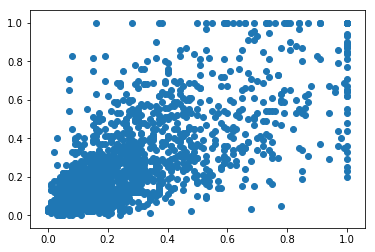

In [107]:
plt.scatter(df['PctIlleg'], df['ViolentCrimesPerPop'])